# Model domain:
- Porous graphite anode
- Porous electrolyte separator (LiPF6 & Ethylene Carbonate:Dimethyl Carbonate)
- Porous LiCoO2 cathode 

State variables:
- Li volume fraction $X_{\rm Li}$ in the graphite, $X_{\rm Li,an}$
- Electric potential of the graphite
- Concentration of the Li+ in the electrolyte in the anode.
- Electrolyte electric potential in the anode, $\phi_{\rm an}$
- Concentration of the Li+ in the electrolyte in the separator.
- Electrolyte electric potential in the separator, $\phi_{\rm sep}$
- Concentration of the Li+ in the electrolyte in the cathode.
- Electrolyte electric potential in the cathode, $\phi_{\rm ca}$
- Li intercalation fraction $X_{\rm Li}$ in the LCO, $X_{\rm Li,ca}$
- Electric potential in the LCO


# Double Layer Current 

Conservation of charge for the anode double layer:
\begin{equation}
    \frac{\partial Q_{\rm an}}{\partial t} = 0 = -I_{\rm ext} -i _{\rm Far}A_{\rm surf} - i_{\rm dl}A_{\rm surf}
\end{equation}
Given:
\begin{equation}
    I_{\rm ext} = i_{\rm ext}A_{\rm geo}
\end{equation}
We get:
\begin{equation}
    i_{\rm dl} = -i_{\rm ext}\frac{A_{\rm geo}}{A_{\rm surf}} -i _{\rm Far}
\end{equation}
Given:
\begin{equation}
    A_{\rm surf} = 4\pi r_p^2 N_p
\end{equation}   
and Given:
\begin{equation}
    n_p = \frac{N_p}{A_{geo}}
\end{equation}
and Given:
\begin{equation} 
    \varepsilon_s = \frac{V_{solids}}{V_{total}} = \frac{N_p\frac{4}{3}{\pi}r_p^3}{A_{geo} H_{el}}
\end{equation}
We get:
\begin{equation}
    n_p = \frac{3 H_{el} \varepsilon_s}{4 \pi r_p^3}
\end{equation}
and We get:
\begin{equation}
    A_{\rm surf} = 4\pi r_p^2 A_{geo} n_p
\end{equation} 
Which gives:
\begin{equation}
    \frac{A_{geo}}{A_{\rm surf}} = \frac{1}{4\pi r_p^2 n_p}
\end{equation} 
Which gives:
\begin{equation}
    \frac{A_{geo}}{A_{\rm surf}} = \frac{4 \pi r_p^3}{4\pi r_p^2 3 H_{el} \varepsilon_s}
\end{equation} 
Which reduces to:
\begin{equation}
    \frac{A_{geo}}{A_{\rm surf}} = \frac{r_p}{3 H_{el} \varepsilon_s} = A_{\rm fac}
\end{equation} 
Which gives:
\begin{equation}
    i_{\rm dl} = -i_{\rm ext}\frac{r_p}{3 H_{el} \varepsilon_s} -i _{\rm Far}
\end{equation}

# Double Layer Potential

Given:
\begin{equation}
    \frac{dQ_{\rm dl}}{dt} = i_{\rm dl}A_{\rm surf}
\end{equation}
and Given:
\begin{equation}
    Q_{\rm dl} = A_{\rm surf}C_{\rm dl}\Delta\phi_{\rm dl}
\end{equation}
For constant $A_{\rm surf}$ and $C_{\rm dl}$ We get:
\begin{equation}
    \frac{dA_{\rm surf}C_{\rm dl}\Delta\phi_{\rm dl}}{dt} = A_{\rm surf}C_{\rm dl}\frac{d\Delta\phi_{\rm dl}}{dt} = A_{\rm surf}i_{\rm dl}
\end{equation}
Given:
\begin{equation}
    \Delta\phi_{\rm dl} = \phi_{\rm elyte} - \phi_{\rm an}
\end{equation}
We get:
\begin{equation}
    \frac{d\Delta\phi_{\rm dl}}{dt} =\frac{d\left(\phi_{\rm elyte} - \phi_{\rm an}\right)}{dt} = \frac{i_{\rm dl}}{C_{\rm dl}} = \frac{1}{C_{\rm dl}}\left(-i_{\rm ext}A_{\rm fac} -i _{\rm Far}\right)
\end{equation}
Using the anode as our reference potential gives:
\begin{equation}
    \phi_{\rm an} = 0V
\end{equation}
Which gives:
\begin{equation}
    \Delta\phi_{\rm dl} = \phi_{\rm elyte}
\end{equation}


In [1]:
# Inputs:

C_rate = 6 # How many charges per hour? 

T = 298 #K W

r_p_an = 4e-6 #m
phi_an_0 = 0 #V 
C_dl_an = 1e4 #F/m2
i_o_an = 4.0  #A/m2
n_an = -1
beta_an = 0.5
H_an = 30e-6  #m
density_graphite = 2260 #kg/m3
capacity_graphite = 350 #Ah/kg
eps_graphite = .65
dPhi_eq_an = -1.6

phi_sep_0 = 1.8  #V W 

r_p_ca = 0.3e-6 #m
phi_ca_0 = 4.6  #V 
C_dl_ca = 1e4 #F/m2
i_o_ca = 100 #A/m2
n_ca = -1
beta_ca = 0.5
H_ca = 50e-6  #m
density_LCO = 2292  #kg/m3
capacity_LCO = 175  #Ah/kg
eps_LCO = 0.65
dPhi_eq_ca = 2.6

# How deep do we want to charge/discharge?
charge_frac = 0.9

### Capacity

\begin{equation}
    {\rm Cap} = C_{\rm AM}\rho_{\rm AM}\varepsilon_{\rm AM}H_{\rm el}
\end{equation}


In [2]:
# Initialize:
phi_dl_an_0 = phi_an_0 - phi_sep_0
phi_dl_ca_0 = phi_ca_0 - phi_sep_0


capacity_anode = capacity_graphite*H_an*eps_graphite*density_graphite
capacity_cathode = capacity_LCO*H_ca*eps_LCO*density_LCO
capacity_area = min(capacity_anode,capacity_cathode)


t_final = charge_frac*3600./C_rate
i_ext = C_rate*capacity_area

A_fac_an = r_p_an/3/H_an/eps_graphite
A_fac_ca = r_p_ca/3/H_ca/eps_LCO

In [3]:
# Constants
F = 96485
R = 8.3145

In [4]:
import numpy as np
from math import exp

def residual(t,SV):
    dSV_dt = np.zeros_like(SV)
    
    eta_an = SV[0] - dPhi_eq_an
    i_Far_an = i_o_an*(exp(-n_an*F*beta_an*eta_an/R/T)
                      - exp(n_an*F*(1-beta_an)*eta_an/R/T))
    i_dl_an = i_ext*A_fac_an - i_Far_an
    dSV_dt[0] = i_dl_an/C_dl_an
    
    
    eta_ca = SV[1] - dPhi_eq_ca
    i_Far_ca = i_o_ca*(exp(-n_ca*F*beta_ca*eta_ca/R/T)
                      - exp(n_ca*F*(1-beta_ca)*eta_ca/R/T))
    i_dl_ca = -i_ext*A_fac_ca - i_Far_ca
    
    
    dSV_dt[1] = i_dl_ca/C_dl_ca
    
    return dSV_dt

In [5]:
from scipy.integrate import solve_ivp

SV_0 = np.array([phi_dl_an_0, phi_dl_ca_0])

time_span = np.array([0,t_final])

solution = solve_ivp(residual,time_span,SV_0,rtol=1e-6, atol=1e-8)

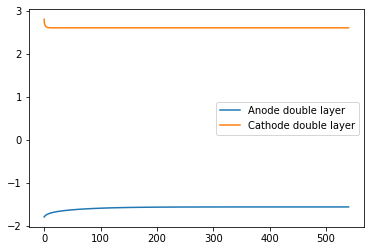

In [7]:
from matplotlib import pyplot as plt
for var in solution.y:
    plt.plot(solution.t,var)
    
plt.legend(['Anode double layer','Cathode double layer'])